#   Linear Rgression 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns 



In [3]:
df=pd.read_csv(r"C:\Users\mdfir\OneDrive\Documents\boston_house_prices.csv")

In [4]:
data=pd.DataFrame(df)

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
x=data[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]]
y=data["LSTAT"]

In [7]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# import Linear Regression , Standardscaler , cross_val_score ,train_test_split

# 1 train_test_split

In [10]:
from sklearn .model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=101)

# 2. StandardScaler

In [13]:
from sklearn .preprocessing import StandardScaler

In [14]:
s=StandardScaler()

In [15]:
standatd_value=s.fit_transform(x_train)
x_test=s.transform(x_test)

# 3.LinearRegression

In [17]:
from sklearn .linear_model import LinearRegression


In [18]:
lr= LinearRegression()
lr.fit(standatd_value,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# cross validation

In [20]:
from sklearn .model_selection import cross_val_score

In [21]:
mse=cross_val_score(lr,x_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [22]:
np.mean(mse)

-2.0797483449542157e-27

# predict

In [24]:
predct=lr.predict(x_test)

In [25]:
from sklearn .metrics import r2_score

In [26]:
score=r2_score(predct,y_test)


In [27]:
score

1.0

In [28]:
predct

array([ 2.97,  5.33, 15.17, 16.23,  4.32,  6.93,  4.63, 27.71,  4.59,
       27.38,  4.67, 21.32, 11.69,  7.79, 10.45, 12.13, 26.64,  3.33,
        6.65,  6.87, 22.88, 15.71,  7.88,  3.53,  3.56, 14.19,  8.05,
       15.39,  8.88,  6.62,  9.16, 11.28,  3.11,  3.16, 14.79, 10.87,
       18.13, 13.04, 34.02,  5.68, 11.65,  5.57,  3.57, 20.85, 14.13,
        9.28,  5.7 , 18.46,  7.22,  8.05,  4.73,  5.29, 14.43, 10.11,
        4.03, 37.97, 15.37, 18.66, 16.03, 14.64,  4.45, 34.41,  7.12,
       12.93, 24.39,  9.42,  9.47, 12.43, 21.08, 11.74, 10.3 ,  6.75,
       15.12, 12.6 ,  7.39, 15.02,  1.73, 30.81,  4.54, 20.32, 16.3 ,
       13.99,  5.33, 18.85, 29.93,  9.09, 13.11,  6.68, 10.13, 12.03,
       23.6 , 26.42,  7.79, 11.25, 30.59,  4.45, 29.53,  6.36, 22.98,
        8.79,  5.25, 12.33])

# mean_squared_error

In [30]:
from sklearn .metrics import mean_squared_error

In [31]:
mse=mean_squared_error(y_test,predct)

In [32]:
mse

6.606710081225974e-29

# mean_absolute_error

In [34]:
from sklearn .metrics import mean_absolute_error

In [35]:
mae=mean_absolute_error(y_test,predct)

In [36]:
mae

6.530723674265626e-15

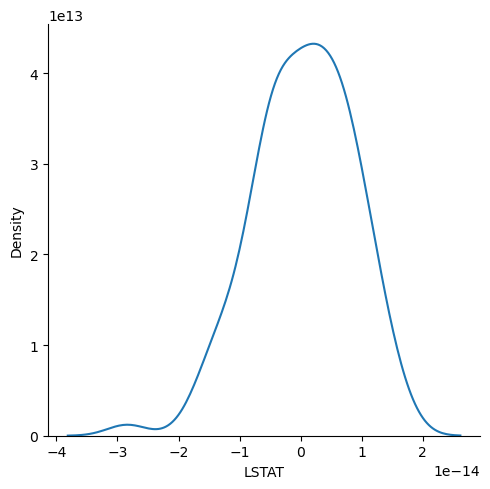

In [37]:
sns.displot(predct-y_test,kind="kde")

# Ridge Regression Algorithm

In [39]:
from sklearn .linear_model import Ridge
from sklearn .model_selection import GridSearchCV

In [40]:
redge_reg=Ridge()

In [41]:
parameters={"alpha":[1,2,3,10,20,30,40,50,60]}
ridgecv=GridSearchCV(redge_reg,parameters,scoring="neg_mean_squared_error", cv=5)

In [98]:
ridgecv.fit(standatd_value,y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [100]:
print(ridgecv.best_params_)# check the alpha value is best 

{'alpha': 1}


In [102]:
print(ridgecv.best_score_)# check the global minima  

-0.002126892067568567


In [104]:
pre=ridgecv.predict(x_test)# pridiuct the value 

# Seaborn import 

In [107]:
import seaborn as sns

C:\Users\mdfir\AppData\Local\Temp\ipykernel_2580\1375666307.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pre)


<Axes: ylabel='Density'>

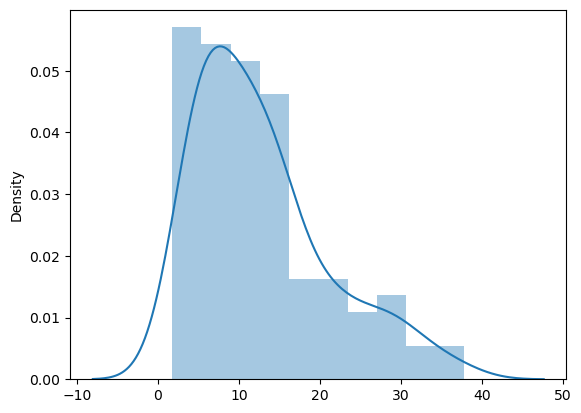

In [109]:
sns.distplot(pre)

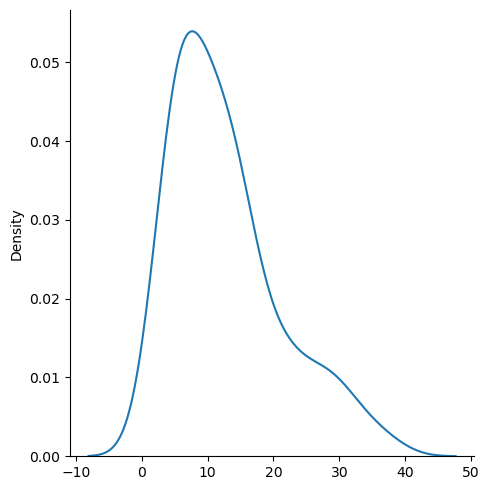

In [111]:
sns.displot(pre,kind="kde")

In [113]:
from sklearn .metrics import r2_score

In [115]:
score=r2_score(pre,y_test)

In [117]:
score

0.9999683440198563

# Lasso Regression 

In [120]:
from sklearn .linear_model import Lasso
from sklearn .model_selection import GridSearchCV

In [122]:
lasso=Lasso()

In [130]:
parameter={"alpha":[1,2,3,4,5,6,7,8]}

In [134]:
g=GridSearchCV(lasso,parameter,scoring="neg_mean_squared_error",cv=10)

In [136]:
g.fit(standatd_value,y_train)

,estimator,Lasso()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


# predict the value 

In [139]:
pre=g.predict(x_test)

In [141]:
from sklearn .metrics import r2_score 

In [143]:
score=r2_score(pre,y_test)

In [145]:
score

0.9706327590121362